In [1]:
import quandl
import datetime
import pandas as pd

In [ ]:
from tqdm import tqdm_notebook
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [2]:
with open("../../keys.txt", "r") as f:
    key = f.readline().replace("\n", "")

In [3]:
today = str(datetime.datetime.today())[:10]

In [4]:
data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'close'] }, 
                        ticker = ['AAPL', 'TSLA', 'AMZN', 'MSFT'], 
                        date = { 'gte': '2019-01-01', 'lte': today }, 
                        api_key=key)

In [5]:
tickers = ['AAPL', 'MSFT']

In [6]:
data = data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'close'] }, 
                               ticker = tickers, 
                               date = { 'gte': '2016-01-01', 'lte': '2016-12-31' }, 
                               api_key=key)

In [7]:
pivoted = data.pivot(index = "date", columns = "ticker", values = "close").reset_index()

In [8]:
pivoted.head(5)

ticker,date,AAPL,MSFT
0,2016-01-04,105.35,54.80
1,2016-01-05,102.71,55.05
2,2016-01-06,100.70,54.05
3,2016-01-07,96.45,52.17
4,2016-01-08,96.96,52.33


In [9]:
pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
date    252 non-null datetime64[ns]
AAPL    252 non-null float64
MSFT    252 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.0 KB


In [10]:
from pandas import Series
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

/anaconda3/envs/money/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


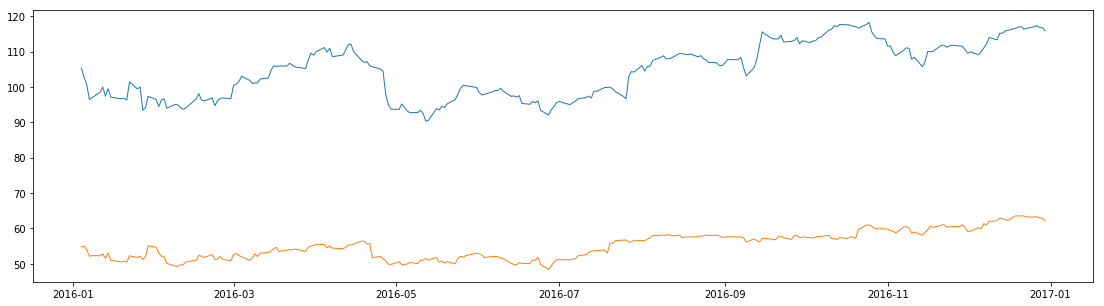

In [12]:
plt.figure(figsize=(19,5))
for ticker in tickers:
    plt.plot("date", ticker, data=pivoted, marker='', linewidth=1)

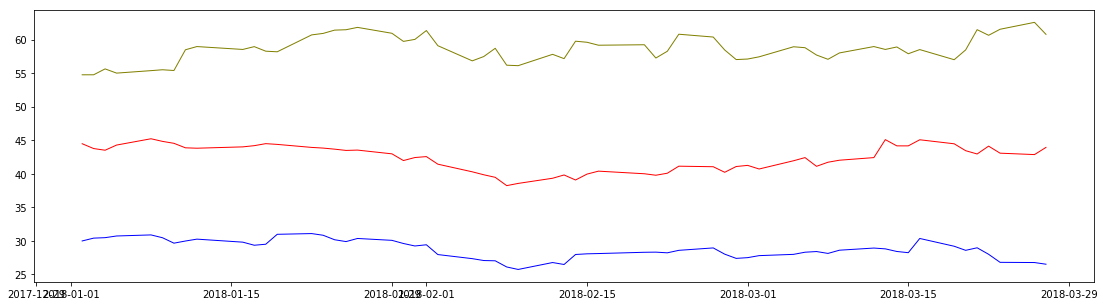

In [48]:
plt.figure(figsize=(19,5))
plt.plot('date', 'APC', data=pivoted, marker='', color='olive', linewidth=1)
plt.plot('date', 'EFII', data=pivoted, marker='', color='blue', linewidth=1)
plt.plot('date', 'PCG', data=pivoted, marker='', color='red', linewidth=1)

In [13]:
pivoted.diff().iloc[1:,1:].cumsum()

ticker,AAPL,MSFT
1,-2.64,0.250
2,-4.65,-0.750
3,-8.90,-2.630
4,-8.39,-2.470
5,-6.82,-2.500
6,-5.39,-2.020
7,-7.96,-3.160
8,-5.83,-1.690
9,-8.22,-3.810
10,-8.69,-4.240


all_funds = ["Index", "P/E", "EPS (ttm)", "Insider Own", "Shs Outstand", "Perf Week", "Market Cap", "Forward P/E", 
             "EPS next Y", "Insider Trans", "Shs Float", "Perf Month", "Income", "PEG", "EPS next Q", "Inst Own", 
             "Short Float", "Perf Quarter", "Sales", "P/S", "EPS this Y", "Inst Trans", "Short Ratio", "Perf Half Y", 
             "Book/sh", "P/B", "EPS next Y", "ROA", "Target Price", "Perf Year", "Cash/sh", "P/C", "EPS next 5Y", 
             "ROE", "52W Range", "Perf YTD", "Dividend", "P/FCF", "EPS past 5Y", "ROI", "52W High", "Beta", 
             "Dividend %", "Quick Ratio", "Sales past 5Y", "Gross Margin", "52W Low", "ATR", "Employees", 
             "Current Ratio", "Sales Q/Q", "Oper. Margin", "RSI (14)", "Volatility", "Optionable", "Debt/Eq", 
             "EPS Q/Q", "Profit Margin", "Rel Volume", "Prev Close", "Shortable", "LT Debt/Eq", "Earnings", "Payout", 
             "Avg Volume", "Price", "Recom", "SMA20", "SMA50", "SMA200", "Volume", "Change"]

In [14]:
data.head(5)

,ticker,date,close
None,,,
0,MSFT,2016-12-30,62.14
1,MSFT,2016-12-29,62.90
2,MSFT,2016-12-28,62.99
3,MSFT,2016-12-27,63.28
4,MSFT,2016-12-23,63.24


# Get fundamentals

quandl.get_table('SHARADAR/SF1', ticker = tickers, calendardate={'gte':'2017-09-01','lte':'2018-01-10'}, 
                 paginate=True, api_key = key)

In [15]:
daily = quandl.get_table('SHARADAR/DAILY', 
                 ticker= tickers, 
                 date = { 'gte': '2016-01-01', 'lte': '2016-12-31' },
                 paginate=True, api_key=key)

In [34]:
daily

,ticker,date,lastupdated,ev,evebit,evebitda,marketcap,pb,pe,ps
None,,,,,,,,,,
0,MSFT,2016-12-30,2018-10-21,420918.3,21.5,15.9,483160.3,6.9,29.2,5.7
1,MSFT,2016-12-29,2018-10-21,426827.5,21.8,16.1,489069.5,6.9,29.5,5.7
2,MSFT,2016-12-28,2018-10-21,427527.3,21.9,16.1,489769.3,7.0,29.6,5.7
3,MSFT,2016-12-27,2018-10-21,429782.2,22.0,16.2,492024.2,7.0,29.7,5.8
4,MSFT,2016-12-23,2018-10-21,429471.2,22.0,16.2,491713.2,7.0,29.7,5.8
5,MSFT,2016-12-22,2018-10-21,431881.5,22.1,16.3,494123.5,7.0,29.8,5.8
6,MSFT,2016-12-21,2018-10-21,431803.8,22.1,16.3,494045.8,7.0,29.8,5.8
7,MSFT,2016-12-20,2018-10-21,431803.8,22.1,16.3,494045.8,7.0,29.8,5.8
8,MSFT,2016-12-19,2018-10-21,432425.8,22.1,16.3,494667.8,7.0,29.9,5.8


## analysis

In [35]:
pivoted.head()

ticker,date,AAPL,MSFT
0,2016-01-04,105.35,54.80
1,2016-01-05,102.71,55.05
2,2016-01-06,100.70,54.05
3,2016-01-07,96.45,52.17
4,2016-01-08,96.96,52.33


In [16]:
com = daily.merge(data, on=["ticker", "date"])

In [17]:
com.columns

Index(['ticker', 'date', 'lastupdated', 'ev', 'evebit', 'evebitda',
       'marketcap', 'pb', 'pe', 'ps', 'close'],
      dtype='object')

## Train test split

In [18]:
train_cols = ['ev', 'evebit', 'evebitda',
       'marketcap', 'pb', 'pe', 'ps', 'close']

In [19]:
train = com[com.ticker == tickers[0]]

In [20]:
test = com[com.ticker == tickers[1]]

## Normalizing the data

df_train, df_test = train_test_split(df_ge, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))

In [22]:
# scale the feature MinMax, build array
x = train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(test.loc[:,train_cols])

## Time series prepping

In [24]:
def build_timeseries(mat, y_col_index, TIME_STEPS):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [25]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

## Running Model

In [64]:
BATCH_SIZE = 5
TIME_STEPS = 60

In [65]:
x_t, y_t = build_timeseries(x_train, len(train_cols)-1, TIME_STEPS)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_test, len(train_cols)-1, TIME_STEPS)
x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)


length of time-series i/o (192, 60, 8) (192,)



length of time-series i/o (192, 60, 8) (192,)


In [66]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
#optimizer = optimizers.RMSprop(lr=lr)
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
#csv_logger = CSVLogger(os.path.join("../output/", 'test' + '.log'), append=True)
history = lstm_model.fit(x_t, y_t, epochs=10, verbose=2, batch_size=BATCH_SIZE,
                    shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
                    trim_dataset(y_val, BATCH_SIZE)))#, callbacks=[csv_logger])

Train on 190 samples, validate on 95 samples
Epoch 1/10
 - 2s - loss: 0.0644 - val_loss: 2.9884
Epoch 2/10
 - 1s - loss: 0.0591 - val_loss: 3.3617
Epoch 3/10
 - 1s - loss: 0.0486 - val_loss: 3.7194
Epoch 4/10
 - 1s - loss: 0.0329 - val_loss: 4.1316
Epoch 5/10
 - 1s - loss: 0.0298 - val_loss: 4.4041
Epoch 6/10
 - 1s - loss: 0.0230 - val_loss: 3.9818
Epoch 7/10
 - 1s - loss: 0.0166 - val_loss: 4.4588
Epoch 8/10
 - 1s - loss: 0.0109 - val_loss: 4.4265
Epoch 9/10
 - 1s - loss: 0.0109 - val_loss: 4.3850
Epoch 10/10
 - 1s - loss: 0.0089 - val_loss: 4.4826


In [69]:
test_pred = lstm_model.predict(x_test_t, verbose=2, batch_size=BATCH_SIZE)

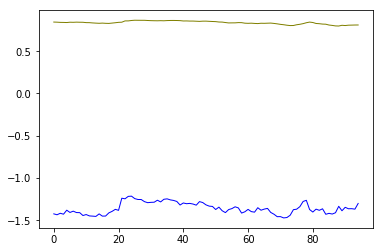

In [76]:
plt.plot(test_pred, color='olive', linewidth=1)
plt.plot(y_test_t, color='blue', linewidth=1)

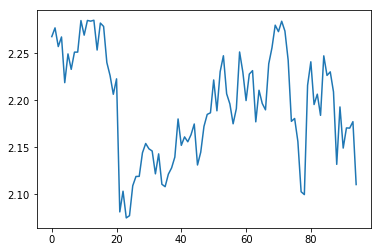

In [80]:
plt.plot(test_pred - y_test_t.reshape([95, 1]))

## not used

In [54]:
import urllib as u
from bs4 import BeautifulSoup as bs

In [73]:
"""
First visit www.Finviz.com and get the base url for the quote page.
example: http://finviz.com/quote.ashx?t=aapl

Then write a simple function to retrieve the desired ratio. 
In this example I'm grabbing Price-to-Book (mrq) ratio

source: http://www.blackarbs.com/blog/8/7/2015/get-free-financial-data-w-python-fundamental-ratios-from-finvizcom
"""

def get_fundamental( symbol, fund ):
    try:
        url = r'http://finviz.com/quote.ashx?t={}'.format(symbol.lower())
        html = u.request.urlopen(url).read()
        soup = bs(html) # lxml but not neccessary
        # Change the text below to get a diff metric
        pb =  soup.find(text = fund)
        pb_ = pb.find_next(class_='snapshot-td2').text
        #print( '{} {} = {}'.format(symbol, fund, pb_) )
        return pb_
    except Exception as e:
        print(e)

In [75]:
get_fundamental("AAPL", "P/B")

'8.01'

In [ ]:
data.write_csv("../../data"+outputfile)